In [1]:
# importing dependencies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt




In [2]:
# reading the csv file using pandas and creating a dataframe 
df_bike = pd.read_csv("resources/austin_B-Cycle_Trips.csv")
#df_station = pd.read_csv("resources/austin_bikeshare_stations.csv")
# displaying the top rows of the dataframe 
df_bike.head()
#df_station

,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year
0,9900285854,Annual (San Antonio B-cycle),207.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,10.0,2014.0
1,9900285855,24-Hour Kiosk (Austin B-cycle),969.0,10/26/2014,13:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2566.0,Pfluger Bridge @ W 2nd Street,58,10.0,2014.0
2,9900285856,Annual Membership (Austin B-cycle),214.0,10/26/2014,13:12:00,2537.0,West & 6th St.,2496.0,8th & Congress,8,10.0,2014.0
3,9900285857,24-Hour Kiosk (Austin B-cycle),745.0,10/26/2014,13:12:00,NaN,Zilker Park at Barton Springs & William Barton...,NaN,Zilker Park at Barton Springs & William Barton...,28,10.0,2014.0
4,9900285858,24-Hour Kiosk (Austin B-cycle),164.0,10/26/2014,13:12:00,2538.0,Bullock Museum @ Congress & MLK,NaN,Convention Center/ 3rd & Trinity,15,10.0,2014.0


In [3]:
# Filling the na values 
df_bike_na = df_bike.fillna(0)
df_bike_na.count()

Trip ID                  991271
Membership Type          991271
Bicycle ID               991271
Checkout Date            991271
Checkout Time            991271
Checkout Kiosk ID        991271
Checkout Kiosk           991271
Return Kiosk ID          991271
Return Kiosk             991271
Trip Duration Minutes    991271
Month                    991271
Year                     991271
dtype: int64

In [4]:
df_bike_na['Checkout Date'] = pd.to_datetime(df_bike_na['Checkout Date']) 
df_bike_na.head(1)
df_bike_na['Year'] = df_bike_na['Checkout Date'].dt.year
df_bike_na['Month'] = df_bike_na['Checkout Date'].dt.month
df_bike_na['Trip Date'] = df_bike_na['Checkout Date'].dt.day
df_bike_na.head(1)

df_bike_na['Trip Day of Week'] = df_bike_na['Checkout Date'].dt.weekday_name
df_bike_na.head(1) 



,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year,Trip Date,Trip Day of Week
0,9900285854,Annual (San Antonio B-cycle),207.0,2014-10-26,13:12:00,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,10,2014,26,Sunday


In [9]:
# Split the hour from the checkout time 
df_bike_na['Checkout Time'] = pd.to_datetime(df_bike_na['Checkout Time'])
df_bike_na['Trip Hour'] = df_bike_na['Checkout Time'].dt.hour
df_bike_na.head(1) 

,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Station ID,Checkout Station,Return Station ID,Return Station,Trip Duration Minutes,Trip Month,Trip Date,Trip Year,Trip Day of Week,Trip Hour
0,9900285854,Annual (San Antonio B-cycle),207.0,2014-10-26,2018-08-28 13:12:00,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,10,26,2014,Sunday,13


In [11]:
# Rename and rearrange the columns in the dataframe
df_bike_na = df_bike_na.rename(columns = {"Checkout Kiosk ID":"Checkout Station ID","Checkout Kiosk":"Checkout Station",
                                          "Return Kiosk ID":"Return Station ID","Return Kiosk":"Return Station",
                                          "Month":"Trip Month","Year":"Trip Year"})
df_bike_na = df_bike_na[["Trip ID","Membership Type","Bicycle ID","Checkout Date","Checkout Time","Checkout Station ID",
                         "Checkout Station","Return Station ID","Return Station","Trip Duration Minutes","Trip Month",
                        "Trip Date","Trip Year","Trip Day of Week","Trip Hour"]]


In [12]:
# Displaying the final and cleaned dataframe 
df_bike_na.head(1) 


,Trip ID,Membership Type,Bicycle ID,Checkout Date,Checkout Time,Checkout Station ID,Checkout Station,Return Station ID,Return Station,Trip Duration Minutes,Trip Month,Trip Date,Trip Year,Trip Day of Week,Trip Hour
0,9900285854,Annual (San Antonio B-cycle),207.0,2014-10-26,2018-08-28 13:12:00,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,10,26,2014,Sunday,13


In [13]:
                                       # ANALYSIS #
# Analyze bike rides per year 
df_bike_year = df_bike_na.groupby('Trip Year')
number_of_rides_per_year = df_bike_year['Trip ID'].count()
number_of_rides_per_year


Trip Year
2013      1457
2014    155703
2015    184521
2016    184680
2017    193492
2018    271418
Name: Trip ID, dtype: int64

In [ ]:
# Bike Rides have beeen increased in the past 5 years 

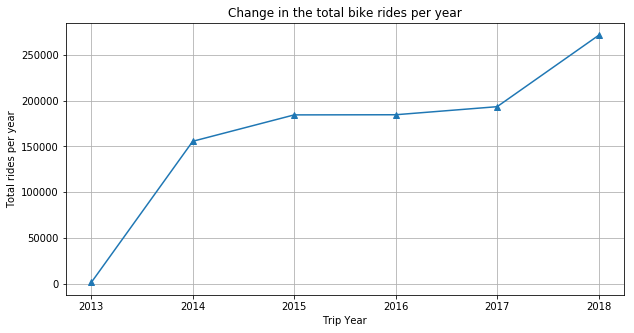

In [86]:
# Plot the total number of rides per year using line graph
Total_rides_per_year_chart = number_of_rides_per_year.plot(kind = "line",grid=True,marker='^',title = "Change in the total bike rides per year",figsize = (10,5))
                                                                                                                    
Total_rides_per_year_chart.set_xlabel("Trip Year")
Total_rides_per_year_chart.set_ylabel("Total rides per year")
#plt.text(3,20000,"bike rides have been increased",bbox=dict(facecolor='red',alpha =0.5))
plt.show()


In [15]:
# Analyze bike rides per month 
df_bike_month = df_bike_na['Trip Month'].value_counts()
df_bike_month



3     186687
4     118056
5     111973
10     90380
6      84971
7      83114
2      73500
9      57769
1      55672
11     52282
8      49179
12     27688
Name: Trip Month, dtype: int64

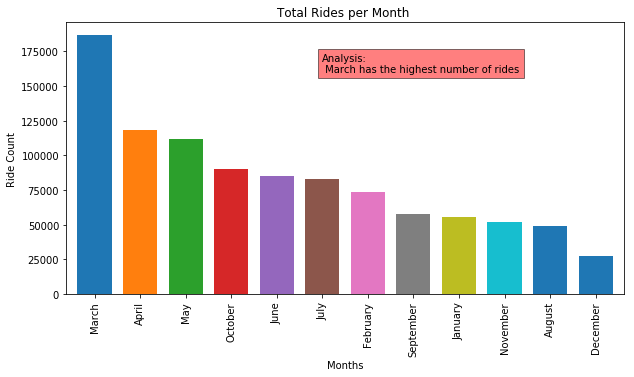

In [52]:
# plot the graph for Total Rides per Month(try to add percentage )
import calendar
mn=[calendar.month_name[int(x)] for x in df_bike_month.index.values.tolist()]
bike_chart = df_bike_month.plot.bar(title = "Total Rides per Month ",width = 0.75,figsize = (10,5))
bike_chart.set_xticklabels(mn)
bike_chart.set_xlabel("Months")
bike_chart.set_ylabel("Ride Count")
plt.text(5,160000,"Analysis:\n March has the highest number of rides",bbox=dict(facecolor='red',alpha =0.5))
plt.show()
plt.savefig("")

# Third month, March has highest number of rides , can you guess why ? we will let you know in a bit 


In [17]:
# Analyze busiest Day of Week 
busy_day = df_bike_na['Trip Day of Week'].value_counts()
busy_day


Saturday     196760
Sunday       162435
Friday       154779
Monday       125567
Thursday     124259
Wednesday    114417
Tuesday      113054
Name: Trip Day of Week, dtype: int64

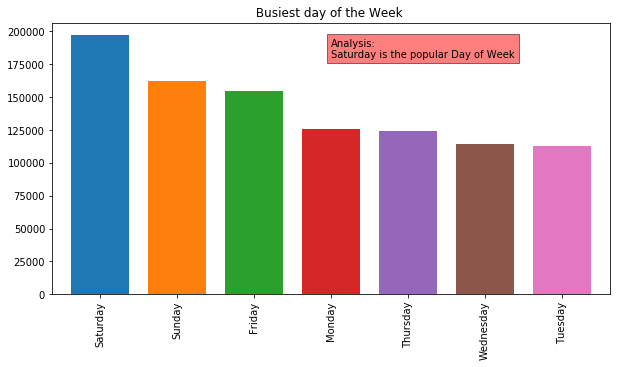

In [54]:
# plot the graph for busiest day of the week 
plt.xlabel = "Days of a week "
plt.ylabel = "Ride count"
week_chart = busy_day.plot(kind = "bar" , title = " Busiest day of the Week  ",width = 0.75,figsize = (10,5))
plt.text(3,180000,"Analysis:\nSaturday is the popular Day of Week",bbox=dict(facecolor='red',alpha =0.5))
plt.show()
plt.savefig("")
# Saturday is the popular Day of Week

In [66]:
# Analyze busiest hour of the day 
busy_hour = df_bike_na['Trip Hour'].value_counts()
busy_hour
# 2:00pm to 5:00pm are the popular hours of the day

17    84145
16    83542
15    83420
13    82475
14    81756
12    76883
18    71090
11    63713
19    56589
10    48347
20    43232
9     39620
21    35217
8     33570
22    27529
23    18760
7     16770
0     13676
1     10077
2      8803
6      5709
3      2827
5      1955
4      1566
Name: Trip Hour, dtype: int64

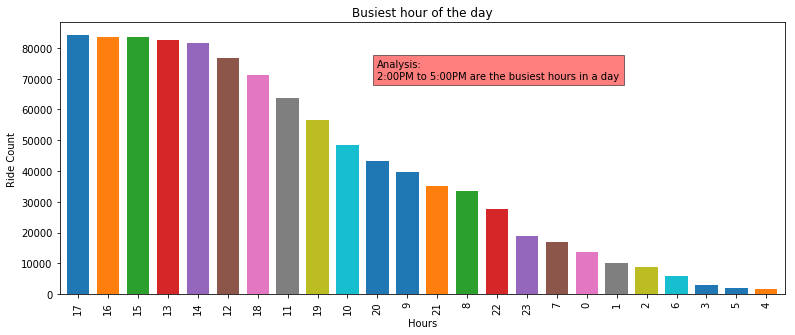

<Figure size 432x288 with 0 Axes>

In [75]:
# plot the graph for busiest hour of the day 
hour_chart = busy_hour.plot(kind = "bar" , title = "Busiest hour of the day",width = 0.75,figsize = (13,5))
hour_chart.set_xlabel("Hours")
hour_chart.set_ylabel("Ride Count")
plt.text(10,70000,"Analysis:\n2:00PM to 5:00PM are the busiest hours in a day",bbox=dict(facecolor='red',alpha =0.5))
plt.show()
plt.savefig("")

In [95]:
# calcualte most popualr stations 
popular_checkout_station = df_bike_na['Checkout Station'].value_counts()
popular_checkout_station.sort_values(ascending = False).head(6)


21st & Speedway @PCL        42167
Riverside @ S. Lamar        36988
City Hall / Lavaca & 2nd    34604
2nd & Congress              33407
5th & Bowie                 32405
Rainey St @ Cummings        31680
Name: Checkout Station, dtype: int64

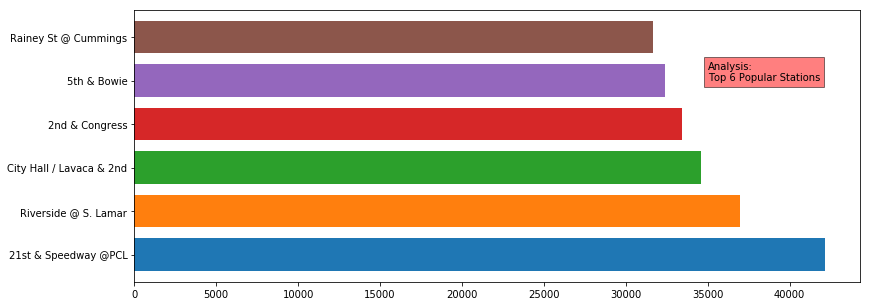

In [98]:
# plot the graph for the popular stations 
pop_station_chart = popular_checkout_station[0:6].plot(kind = "barh",width = 0.75,figsize = (13,5))
plt.text(35000,4,"Analysis:\nTop 6 Popular Stations",bbox=dict(facecolor='red',alpha =0.5))
plt.show()

In [100]:
# Calculate most Popular Membership type 
popular_membership_type = df_bike_na['Membership Type'].value_counts() 
popular_membership_type.head(6)



Walk Up                           368322
Local365                          167363
U.T. Student Membership           158480
24-Hour Kiosk (Austin B-cycle)    108672
Local30                            54774
Weekender                          43880
Name: Membership Type, dtype: int64

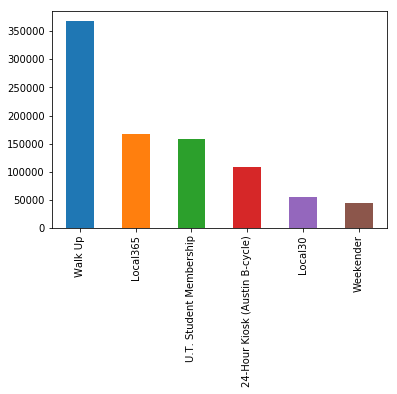

In [82]:
# plot the graph for the popular mebership types 
popular_membership_type[0:6].plot(kind = "bar")

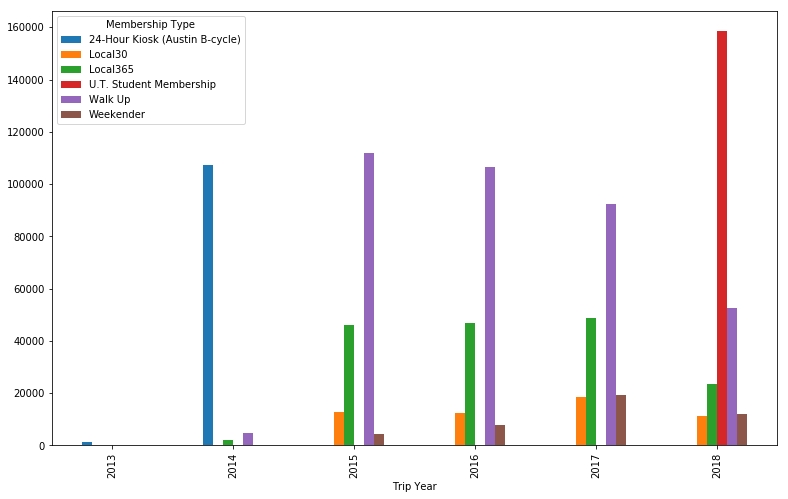

In [99]:
# find the popular member ship types
mem_type_df = df_bike_na.groupby(["Membership Type"],as_index=True).size()
mem_type_df = mem_type_df.sort_values(ascending=False)

#select the data for the top 6 memberships 
mem_type_year = []

for memtype in mem_type_df[:6].to_dict():
    #print(memtype)
    df_temp = df_bike_na.loc[df_bike_na["Membership Type"]==memtype]
    mem_type_year.append(df_temp)
    
mem_type_year_df = pd.concat(mem_type_year)

# Now plot the data, since we have the top 6 membership types now group by Year and display
fig, ax = plt.subplots(figsize=(13,8))
# Without unstack, the rows are displayed seperately. 
mem_type_year_df.groupby(['Trip Year','Membership Type']).count()['Trip ID'].unstack().plot.bar(ax=ax)


In [ ]:
df_bike_na.dtypes

In [ ]:

df_bike_change1 = df_bike_na["Trip Year"].astype(int)
df_bike_na['Trip Year'] = df_bike_change1
df_bike_change2 = df_bike_na["Trip Month"].astype(int)
df_bike_na['Trip Month'] = df_bike_change2
df_bike_change3 = df_bike_na["Trip Date"].astype(int)
df_bike_na['Trip Date'] = df_bike_change3
df_bike_na.dtypes


In [ ]:
                       ## SXSW ##

# Compare the count of bike rides during  SXSW or other popular
#events like ACL for different years (2013 to 2018).

#SXSW 2018 - March 12 to March 18 2018
# SXSW 2017 - Mar 10, 2017 – Mar 19, 2017
# SXSW 2016 - Mar 11, 2016 – Mar 20, 2016
# SXSW 2015 - Mar 13, 2015 – Mar 23, 2015
# SXSW 2014 - Mar 7, 2014 – Mar 17, 2014
# SXSW 2013 - March 8 2013 - March 18 2013

# Number of rides per SXSW
df_bike_2018 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2018), : ]
df_bike_2018_march = df_bike_2018.loc[(df_bike_2018["Trip Month"] == 3), : ]
df_bike_2018_march_SXSW = df_bike_2018_march.loc[(df_bike_2018_march["Trip Date"] >= 12)& (df_bike_2018_march["Trip Date"] <= 18), : ]
number_of_rides_SXSW_2018 = df_bike_2018_march_SXSW['Trip ID'].count()
number_of_rides_SXSW_2018



In [ ]:
df_bike_2017 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2017), : ]
df_bike_2017_march = df_bike_2017.loc[(df_bike_2017["Trip Month"] == 3), : ]
df_bike_2017_march_SXSW = df_bike_2017_march.loc[(df_bike_2017_march["Trip Date"] >= 10)& (df_bike_2017_march["Trip Date"] <= 19), : ]
number_of_rides_SXSW_2017 = df_bike_2017_march_SXSW['Trip ID'].count()
number_of_rides_SXSW_2017


In [ ]:
df_bike_2016 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2016)]
df_bike_2016_march = df_bike_2016.loc[(df_bike_2016["Trip Month"] == 3), : ]
df_bike_2016_march_SXSW = df_bike_2016_march.loc[(df_bike_2016_march["Trip Date"] >= 11)& (df_bike_2016_march["Trip Date"] <= 20), : ]
number_of_rides_SXSW_2016 = df_bike_2016_march_SXSW['Trip ID'].count()
number_of_rides_SXSW_2016

In [ ]:
df_bike_2015 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2015)]
df_bike_2015_march = df_bike_2015.loc[(df_bike_2015["Trip Month"] == 3), : ]
df_bike_2015_march_SXSW = df_bike_2015_march.loc[(df_bike_2015_march["Trip Date"] >= 13)& (df_bike_2015_march["Trip Date"] <= 23), : ]
number_of_rides_SXSW_2015 = df_bike_2015_march_SXSW['Trip ID'].count()
number_of_rides_SXSW_2015

In [ ]:
df_bike_2014 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2014)]
df_bike_2014_march = df_bike_2014.loc[(df_bike_2014["Trip Month"] == 3), : ]
df_bike_2014_march_SXSW = df_bike_2014_march.loc[(df_bike_2014_march["Trip Date"] >= 13)& (df_bike_2014_march["Trip Date"] <= 23), : ]
number_of_rides_SXSW_2014 = df_bike_2014_march_SXSW['Trip ID'].count()
number_of_rides_SXSW_2014

In [ ]:
### ACL
#ACL 2018 - Oct 5, 2018 – Oct 14, 2018
# ACL 2017 - Oct 6, 2017 – Oct 15, 2017
# ACL 2016 -  Sep 30, 2016 – Oct 9, 2016
# ACL 2015 - Oct 2, 2015 – Oct 11, 2015
# ACL 2014 - 10/3-5 and 10/10-12, 2014
# ACL 2013 - October 4-6 and 11-13 ,2013




In [ ]:
# Calculate number of bike rides during ACL 2017 
df_bike_2017 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2017), : ]
df_bike_2017_oct = df_bike_2017.loc[(df_bike_2017["Trip Month"] == 10), : ]
df_bike_2017_oct_acl = df_bike_2017_oct.loc[(df_bike_2017_oct["Trip Date"] >= 6)& (df_bike_2017_oct["Trip Date"] <= 15), : ]
number_of_rides_acl_2017 = df_bike_2017_oct_acl['Trip ID'].count()
number_of_rides_acl_2017

In [ ]:
# Calculate number of bike rides during ACL 2016
df_bike_2016 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2016), : ]
df_bike_2016_oct = df_bike_2016.loc[(df_bike_2016["Trip Month"] == 10), : ]
df_bike_2016_oct_acl = df_bike_2016_oct.loc[ (df_bike_2016_oct["Trip Date"] <= 9), : ]
number_of_rides_oct_acl_2016 = df_bike_2016_oct_acl['Trip ID'].count()

df_bike_2016 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2016), : ]
df_bike_2016_sept = df_bike_2016.loc[(df_bike_2016["Trip Month"] == 9), : ]
df_bike_2016_sept_acl = df_bike_2016_sept.loc[ (df_bike_2016_sept["Trip Date"] >= 30), : ]
number_of_rides_sept_acl_2016 = df_bike_2016_sept_acl['Trip ID'].count()

number_of_rides_acl_2016 = number_of_rides_oct_acl_2016 + number_of_rides_sept_acl_2016
number_of_rides_acl_2016



In [ ]:
# Calculate number of bike rides during ACL 2015
df_bike_2015 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2015), : ]
df_bike_2015_oct = df_bike_2015.loc[(df_bike_2015["Trip Month"] == 10), : ]
df_bike_2015_oct_acl = df_bike_2015_oct.loc[(df_bike_2015_oct["Trip Date"] >= 2)& (df_bike_2015_oct["Trip Date"] <= 11), : ]
number_of_rides_acl_2015 = df_bike_2015_oct_acl['Trip ID'].count()
number_of_rides_acl_2015

In [ ]:
# Calculate number of bike rides during ACL 2014

df_bike_2014 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2014), : ]
df_bike_2014_oct = df_bike_2014.loc[(df_bike_2014["Trip Month"] == 10), : ]
df_bike_2014_oct_acl = df_bike_2014_oct.loc[((df_bike_2014_oct["Trip Date"] >= 3)& (df_bike_2014_oct["Trip Date"] <= 5)) | ((df_bike_2014_oct["Trip Date"] >= 10)& (df_bike_2014_oct["Trip Date"] <= 12)), : ]
number_of_rides_acl_2014 = df_bike_2014_oct_acl['Trip ID'].count()
number_of_rides_acl_2014


In [ ]:
# # Calculate number of bike rides during ACL 2013

df_bike_2013 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2013), : ]
df_bike_2013_oct = df_bike_2013.loc[(df_bike_2013["Trip Month"] == 10), : ]
df_bike_2013_oct_acl = df_bike_2013_oct.loc[((df_bike_2013_oct["Trip Date"] >= 4)& (df_bike_2013_oct["Trip Date"] <= 6)) | ((df_bike_2013_oct["Trip Date"] >= 11)& (df_bike_2013_oct["Trip Date"] <= 13)), : ]
number_of_rides_acl_2013 = df_bike_2013_oct_acl['Trip ID'].count()
number_of_rides_acl_2013

## no data for ACL 2013

In [ ]:
##### UBER BAN
# Date May 9 2016 - May 29 2017 
# # To calculate the number of rides during UBER BAN in 2017

## Number of bike rides during May 1st to May 29th 2017
df_bike_2017 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2017), : ]
df_bike_2017_may = df_bike_2017.loc[(df_bike_2017["Trip Month"] == 5), : ]
df_bike_2017_may_uber_ban = df_bike_2017_may.loc[(df_bike_2017_may["Trip Date"] <= 29), : ]
number_of_rides_uber_ban_2017 = df_bike_2017_may_uber_ban['Trip ID'].count()
number_of_rides_uber_ban_2017 


In [ ]:
# Number of bike rides from Jan 1st to 30th April 2017
df_bike_2017 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2017), : ]
df_bike_2017_till_april_uber_ban = df_bike_2017.loc[(df_bike_2017["Trip Month"] < 5), : ]
number_of_rides_uber_ban_2017_till_april = df_bike_2017_till_april_uber_ban['Trip ID'].count()
number_of_rides_uber_ban_2017_till_april 

In [ ]:
## Number of bike rides during June 1st to Dec 31st 2016
df_bike_2016 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2016), : ]
df_bike_2016_till_june_uber_ban = df_bike_2016.loc[(df_bike_2016["Trip Month"] >= 6) & (df_bike_2016["Trip Month"] <= 12), : ]
number_of_rides_uber_ban_2016_till_august = df_bike_2016_till_june_uber_ban['Trip ID'].count()
number_of_rides_uber_ban_2016_till_august 

In [ ]:
# To calculate the number of rides from May 9th to May 31st 2016
df_bike_2016 = df_bike_na.loc[(df_bike_na["Trip Year"] ==2016), : ]
df_bike_2016_may = df_bike_2016.loc[(df_bike_2016["Trip Month"] == 5), : ]
df_bike_2016_may_uber_ban = df_bike_2016_may.loc[(df_bike_2016_may["Trip Date"] >= 9), : ]
number_of_rides_uber_ban_2016 = df_bike_2016_may_uber_ban['Trip ID'].count()
number_of_rides_uber_ban_2016 

In [ ]:
number_of_rides_uber_ban = number_of_rides_uber_ban_2016 + number_of_rides_uber_ban_2017 + number_of_rides_uber_ban_2016_till_august+ number_of_rides_uber_ban_2017_till_april  
number_of_rides_uber_ban

# Number of rides during uber ban is greater than average number of rides per year

In [ ]:
average_number_of_rides_per_year = number_of_rides_per_year.mean()
average_number_of_rides_per_year

In [ ]:
                     ## calculation average trip duration

## To check how many bikes were stolen
df_bike_stolen = df_bike_na.loc[df_bike_na["Return Station"] == "Stolen"]
number_bike_stolen = df_bike_stolen["Return Station"].count()
number_bike_stolen

In [ ]:
## To check how many bikes have trip duration has zero minutes (faulty data)
df_bike_trip_minutes_zero = df_bike_na.loc[df_bike_na["Trip Duration Minutes"] == 0]
number_bike_trip_minutes_zero = df_bike_trip_minutes_zero["Trip ID"].count()
number_bike_trip_minutes_zero

In [ ]:
## Calculating the average trip duration for the clean data

df_bike_trip_minutes = df_bike_na.loc[(df_bike_na["Return Station"] != "Stolen") & df_bike_na["Trip Duration Minutes"] != 0 ]
df_bike_trip_minutes["Trip Duration Minutes"].mean()

In [ ]:
subscriber_type = df_bike_na['Membership Type'].value_counts().index
top_subscriber_type = subscriber_type[0:6]

trip_minutes = []
for element in top_subscriber_type:
    time_min = df_bike_na[df_bike_na['Membership Type'] == element]['Trip Duration Minutes'].values
    trip_minutes.append(np.mean(time_min))



x_axis  =  np.arange(0, len(top_subscriber_type))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.xticks(tick_locations, top_subscriber_type, rotation=90)
plt.bar(x_axis, trip_minutes)
plt.title('Average trip duration by Top Membership Type')
plt.ylabel('Minutes')
plt.show()



In [ ]:
trip_minutes